#Dataset
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade, while G1 and G2 correspond to the 1st and 2nd grades. It is more difficult to predict G3 without G2 and G1.




### Attribute Information: (taken from [archive.ics.uci.edu](https://archive.ics.uci.edu/ml/datasets/Student+Performance))
### Attributes :
 1. ***school*** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. ***sex*** - student's sex (binary: 'F' - female or 'M' - male)
3. ***age*** - student's age (numeric: from 15 to 22)
4. ***address*** - student's home address type (binary: 'U' - urban or 'R' - rural)
5. ***famsize*** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. ***Pstatus*** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. ***Medu*** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. ***Fedu*** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. ***Mjob*** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. ***Fjob*** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. ***reason*** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. ***guardian*** - student's guardian (nominal: 'mother', 'father' or 'other')
13. ***traveltime*** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. ***studytime*** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. ***failures*** - number of past class failures (numeric: n if 1<=n<3, else 4)
16. ***schoolsup*** - extra educational support (binary: yes or no)
17. ***famsup*** - family educational support (binary: yes or no)
18. ***paid*** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. ***activities*** - extra-curricular activities (binary: yes or no)
20. ***nursery*** - attended nursery school (binary: yes or no)
21. ***higher*** - wants to take higher education (binary: yes or no)
22. ***internet*** - Internet access at home (binary: yes or no)
23. ***romantic*** - with a romantic relationship (binary: yes or no)
24. ***famrel*** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. ***freetime*** - free time after school (numeric: from 1 - very low to 5 - very high)
26. ***goout*** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. ***Dalc*** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. ***Walc*** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. ***health*** - current health status (numeric: from 1 - very bad to 5 - very good)
30. ***absences*** - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Portuguese:
31. ***G1*** - first period grade (numeric: from 0 to 20)
32. ***G2*** - second period grade (numeric: from 0 to 20)
33. ***G3*** - final grade (numeric: from 0 to 20, output target)



## Load Data

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load data
df=pd.read_csv('/content/student-por.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
# Shape of data
df.shape

(649, 33)

In [ ]:
# Check for null values
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    o

In [ ]:
# Summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std   

## Adding Level Column

In [ ]:
# Grade Levels:
y=df['G3']
criteria = [y.between(12, 20), y.between(0, 12)]
# Define 2 classes
levels = ['Pass', 'Fail']
df['Level'] = np.select(criteria, levels, 0)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Level
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Pass


<ipython-input-351-7d6d86d7d0d8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sorted, x='Level',palette='viridis')
<ipython-input-351-7d6d86d7d0d8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sorted, x='Level', y='G3',palette='viridis')


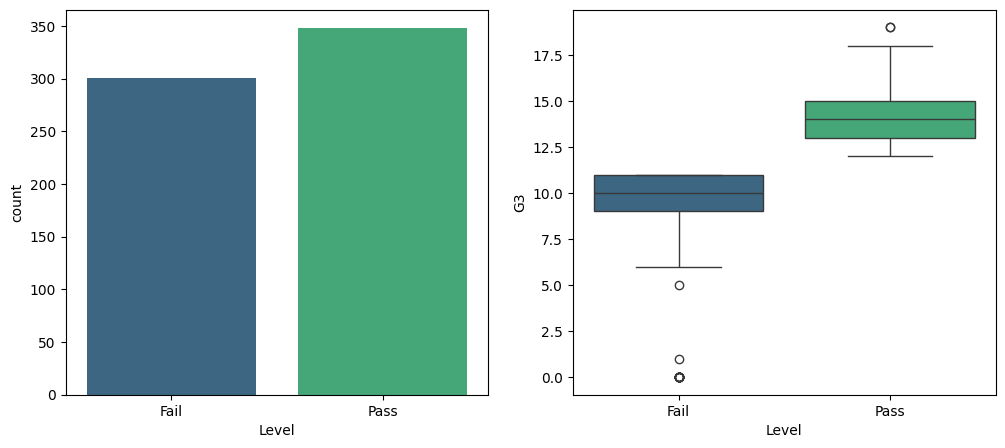

In [ ]:
plt.figure(figsize=(12, 5))
df_sorted = df.sort_values(by='Level')
# Plot 1: Countplot
plt.subplot(1, 2, 1)
sns.countplot(data=df_sorted, x='Level',palette='viridis')

# Plot 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_sorted, x='Level', y='G3',palette='viridis')

plt.show()

## Skewness and Kurtosis

<ipython-input-352-1e7bc3d05e61>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df['G3'],


<Figure size 200x200 with 0 Axes>

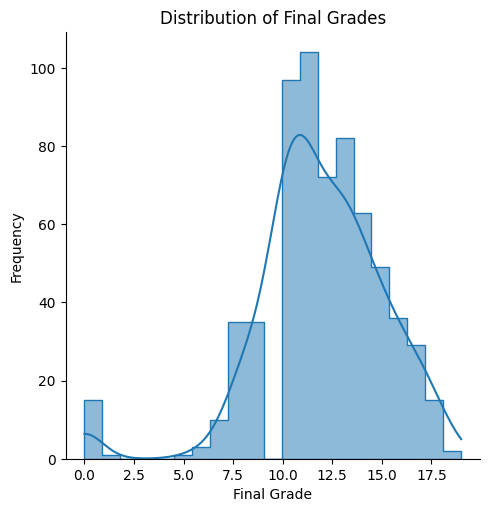

In [ ]:
# Average grade distribution
plt.figure(figsize=(2,2))
sns.displot(data=df['G3'], element='step', kde=True, palette='viridis')
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(f"skewness: {df['G3'].skew()}")
print(f"kurtosis: {df['G3'].kurt()}")

skewness: -0.9129093547157225
kurtosis: 2.7122043191041723


- The average grades distribution is slightly skewed to the left, suggesting that there may be more students with higher grades.
- The distribution is slightly peaked, indicating that it has heavier tails and a sharper peak compared to a normal distribution, but it is not highly peaked.

# Data Visualization

<ipython-input-354-3e3279bf32f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


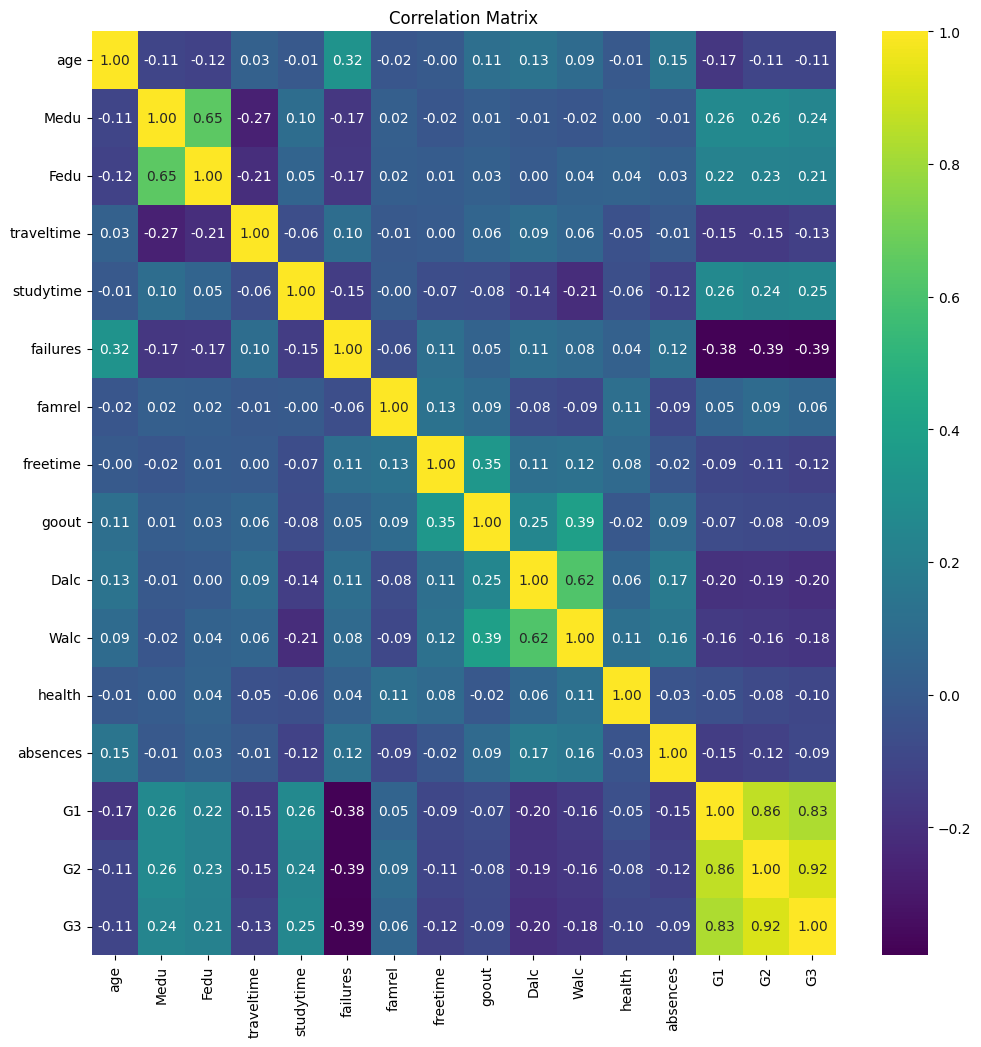

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


- The correlation between the first term grade ('G1'), the second term grade ('G2'), and the final grade ('G3') is particularly strong, which is expected.
- The amount of study time ('studytime') has a low positive correlation with the final grade.
- The number of past class failures ('failures') has a low negative correlation with each grade.
- The level of education of the mother ('Medu') and the father ('Fedu') have a low positive correlation with the final grade.

<ipython-input-355-dd9ff88fe356>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copy, x='age_group', palette='viridis')


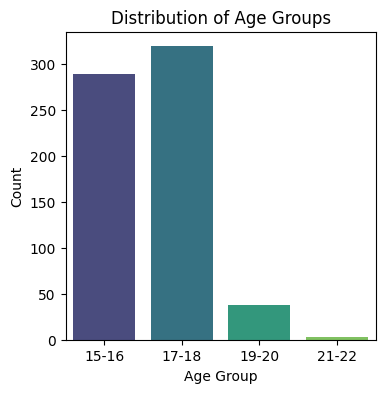

In [ ]:
# Visualize the distribution of age groups
bins = [15, 17, 19, 21, 23]
labels = ['15-16', '17-18', '19-20', '21-22']
df_copy = df.copy()
df_copy['age_group'] = pd.cut(df_copy['age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(4, 4))
sns.countplot(data=df_copy, x='age_group', palette='viridis')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

most students are between age 17-18 as they are secondary students while 21-22 seem like outliers

<ipython-input-356-ed41c876c4cb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='studytime', y='G3', palette='viridis')
<ipython-input-356-ed41c876c4cb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='absences', y='G3', palette='viridis')
<ipython-input-356-ed41c876c4cb>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='higher', y='G3', palette='viridis')
<ipython-input-356-ed41c876c4cb>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

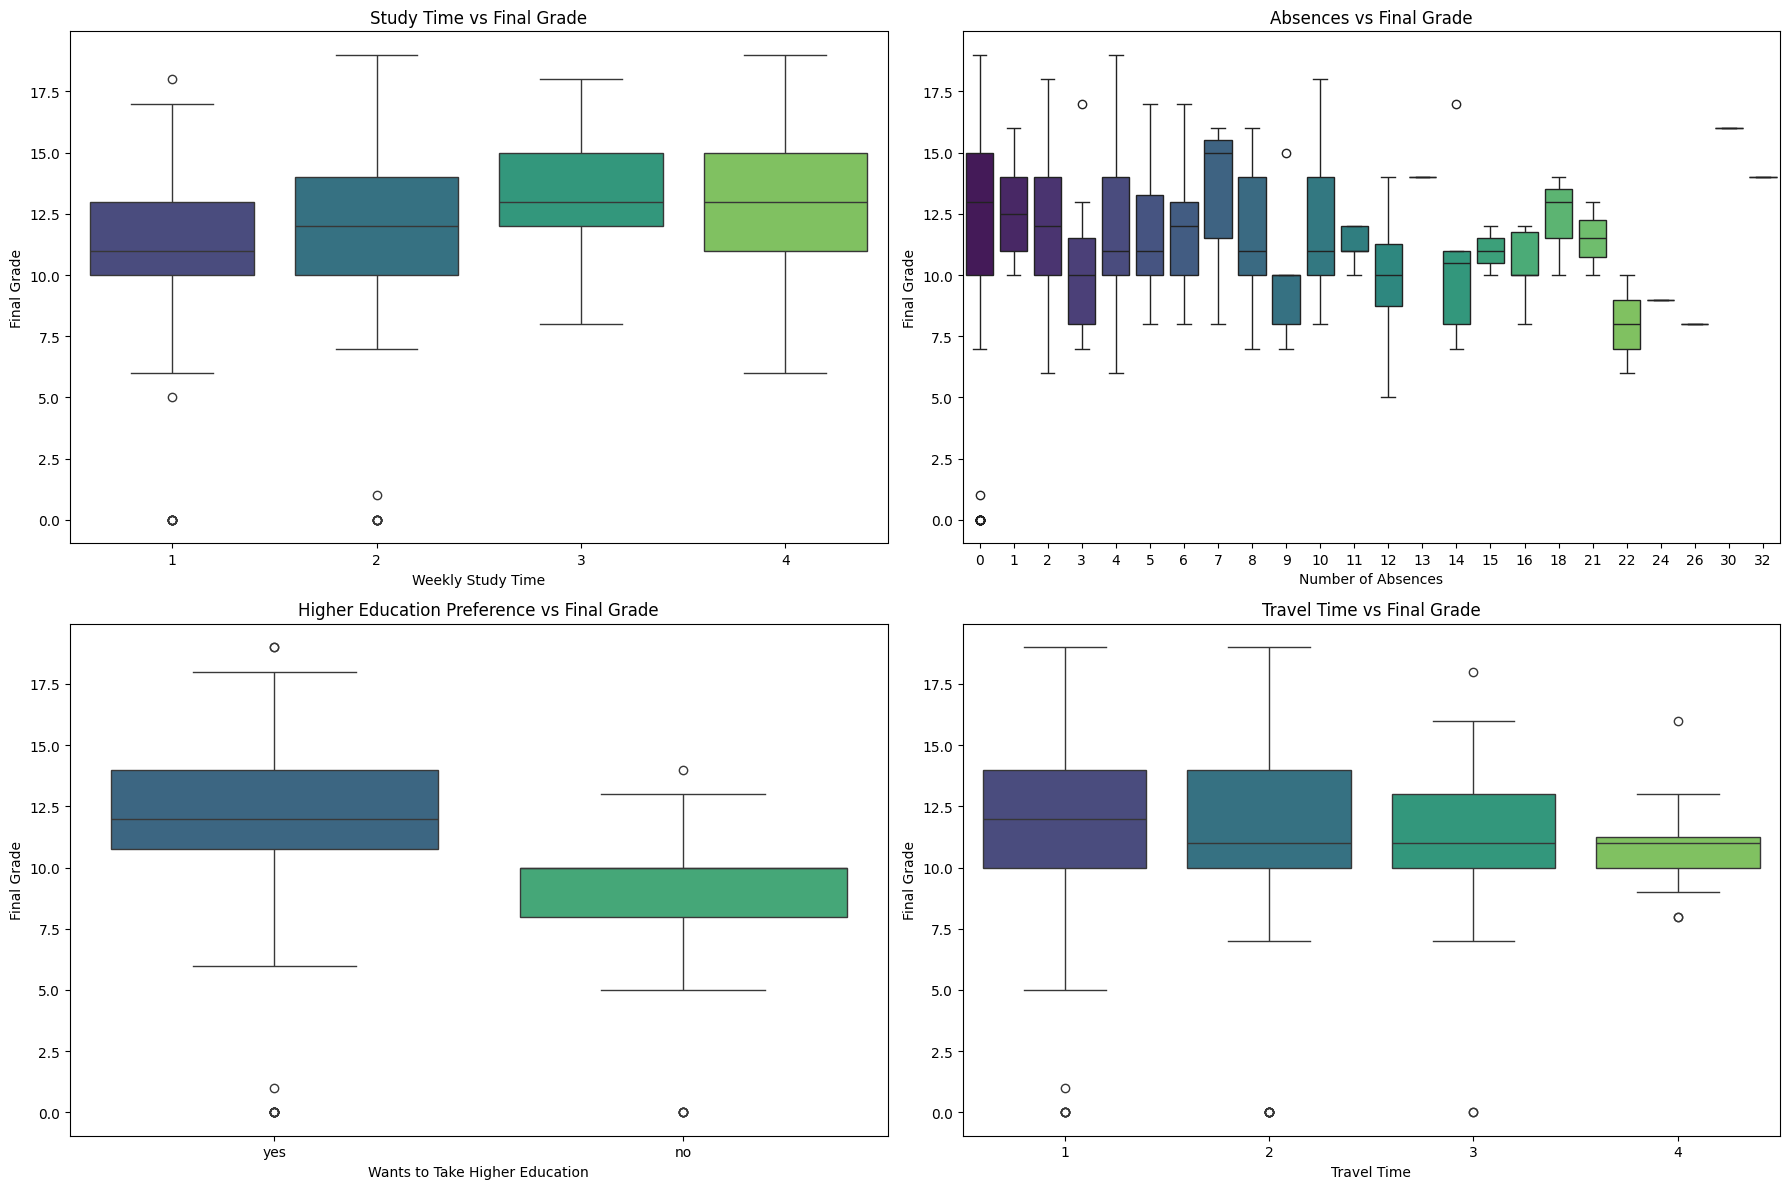

In [ ]:
plt.figure(figsize=(18, 12))

# Plotting studytime vs Final Grade
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='studytime', y='G3', palette='viridis')
plt.title('Study Time vs Final Grade')
plt.xlabel('Weekly Study Time')
plt.ylabel('Final Grade')

# Plotting absences vs Final Grade
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='absences', y='G3', palette='viridis')
plt.title('Absences vs Final Grade')
plt.xlabel('Number of Absences')
plt.ylabel('Final Grade')

# Plotting higher vs Final Grade
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='higher', y='G3', palette='viridis')
plt.title('Higher Education Preference vs Final Grade')
plt.xlabel('Wants to Take Higher Education')
plt.ylabel('Final Grade')

# Plotting traveltime vs Final Grade
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='traveltime', y='G3', palette='viridis')
plt.title('Travel Time vs Final Grade')
plt.xlabel('Travel Time')
plt.ylabel('Final Grade')

plt.tight_layout()
plt.show()


- Students studying for 3-4 hours per week tend to have the highest grades, with little difference between the final grades for 3 and 4 hours of study time.
- Higher rates of absenteeism are associated with lower grades.
- Higher grades are associated with a greater preference for higher education, suggesting a positive relationship between academic performance and aspirations for further education.
- Students living closer to the school tend to achieve higher average grades, suggesting that geographical proximity to the school may positively influence academic performance.

# Data Pre-processing

- In our classification model, we aim to predict whether a student passes or fails based on specific features.
- To ensure the model's efficiency, we will select features that offer unique information and avoid redundancy.
- we will choose features that are of particular interest for our classification task, such as 'studytime', 'failures', 'schoolsup', and 'higher', among others.
- we also dropped G3 as it is our target that we changed to categorical by adding 'Level' column

In [ ]:
# Dropping irrelevant columns that has no significant influence on student performance
df= df.drop(['G3', 'school', 'address', 'Mjob', 'Fjob', 'reason', 'guardian', 'paid', 'nursery', 'famrel', 'Walc', 'Fedu', 'sex', 'famsize', 'goout', 'traveltime', 'higher'],axis=1)

In [ ]:
# Label Encoding
for col in df.columns:
  if type(df[col][0]) is str:
    print(col,df[col].unique())

Pstatus ['A' 'T']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
activities ['no' 'yes']
internet ['no' 'yes']
romantic ['no' 'yes']
Level ['Fail' 'Pass']


In [ ]:
# for yes no in columns
columns_binary = ['schoolsup', 'famsup', 'activities', 'internet', 'romantic']
mapping = {'no': 0, 'yes': 1}
for column in columns_binary:
    df[column] = df[column].map(mapping)

# label encoding for categorical variable that has only two categories and target variable
columns_labels = [ 'Pstatus','Level']
label_encoder = LabelEncoder()
for column in columns_labels:
    df[column] = label_encoder.fit_transform(df[column])

#Standard Scaler for numeric variables
columns_numeric= ['G1', 'G2', 'age','absences']
scaler = StandardScaler()
df[columns_numeric] = scaler.fit_transform(df[columns_numeric])

In [ ]:
df.head()

,age,Pstatus,Medu,studytime,failures,schoolsup,famsup,activities,internet,romantic,freetime,Dalc,health,absences,G1,G2,Level
0,1.031695,0,4,2,0,1,0,0,0,0,3,1,3,0.073433,-4.155470,-0.195820,0
1,0.210137,1,1,2,0,0,1,0,1,0,3,1,3,-0.357863,-0.874570,-0.195820,0
2,-1.432980,1,1,2,0,1,0,0,1,0,3,2,3,0.504730,0.219064,0.491137,1
3,-1.432980,1,4,3,0,0,1,1,1,1,2,1,5,-0.789159,0.948153,0.834615,1
4,-0.611422,1,3,2,0,0,1,0,0,0,3,1,5,-0.789159,-0.145481,0.491137,1


In [ ]:
df['Level'].value_counts()

1    348
0    301
Name: Level, dtype: int64

# Traditional Machine Learning Classification

In [ ]:
# Import models and metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Splitting data into features (X) and encoded target variable (y)
X = df.drop(['Level'], axis=1)
y = df['Level']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_test.shape)
print(X_train.shape)

In [ ]:
# Function to be used with common logic for several model study
def train_models(X_train, y_train, models, param_grids, cv=5):
    best_models = {}
    for name, model in models.items():
        try:
            grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
            grid_search.fit(X_train, y_train)
            best_models[name] = grid_search.best_estimator_
        except Exception as e:
            print(f"An error occurred while fitting {name}: {e}")
            best_models[name] = None
    return best_models

In [ ]:
# Function to be used when evaluation each model
def evaluate_models(models, X_test, y_test):
    model_scores = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        model_scores[name] = {
            'test_accuracy': accuracy,
            'test_precision': precision,
            'test_recall': recall,
            'test_f1': f1
        }
    return model_scores

In [ ]:
# Common ML classifier that we intend to use
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB()
}

In [ ]:
# Define a set of parameters for each model
# Multiple parameters are required in order to perform grid search
param_grids = {
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
        'max_iter': [500,1000],
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'ccp_alpha': [0.0, 0.1, 0.2, 0.3]
    },
    'SVM': {
        'C': [0.001,0.1, 1],
        'kernel': ['rbf', 'linear']
    },
    'KNN': {
        'n_neighbors': [10,15,18],
        'weights': ['uniform', 'distance']
    },
    'NaiveBayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }

}

In [ ]:
# Train models
best_models = train_models(X_train, y_train, models, param_grids)

In [ ]:
model_scores = evaluate_models(best_models, X_test, y_test)

# Display results
for name, scores in model_scores.items():
    print(f"Model: {name}")
    print(f"Test Accuracy: {scores['test_accuracy']:.4f}")
    print(f"Test Precision: {scores['test_precision']:.4f}")
    print(f"Test Recall: {scores['test_recall']:.4f}")
    print(f"Test F1 Score: {scores['test_f1']:.4f}")
    print(f"Best Parameters: {best_models[name].get_params()}\n")  # Display best parameters

# Identify the best overall model based on test accuracy
best_model_name = max(model_scores, key=lambda name: model_scores[name]['test_accuracy'])
print(f"The best overall model is: {best_model_name}")

Model: LogisticRegression
Test Accuracy: 0.9202
Test Precision: 0.9212
Test Recall: 0.9202
Test F1 Score: 0.9198
Best Parameters: {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Model: DecisionTree
Test Accuracy: 0.9387
Test Precision: 0.9437
Test Recall: 0.9387
Test F1 Score: 0.9389
Best Parameters: {'ccp_alpha': 0.1, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Model: SVM
Test Accuracy: 0.9387
Test Precision: 0.9387
Test Recall: 0.9387
Test F1 Score: 0.9385
Best Parameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coe

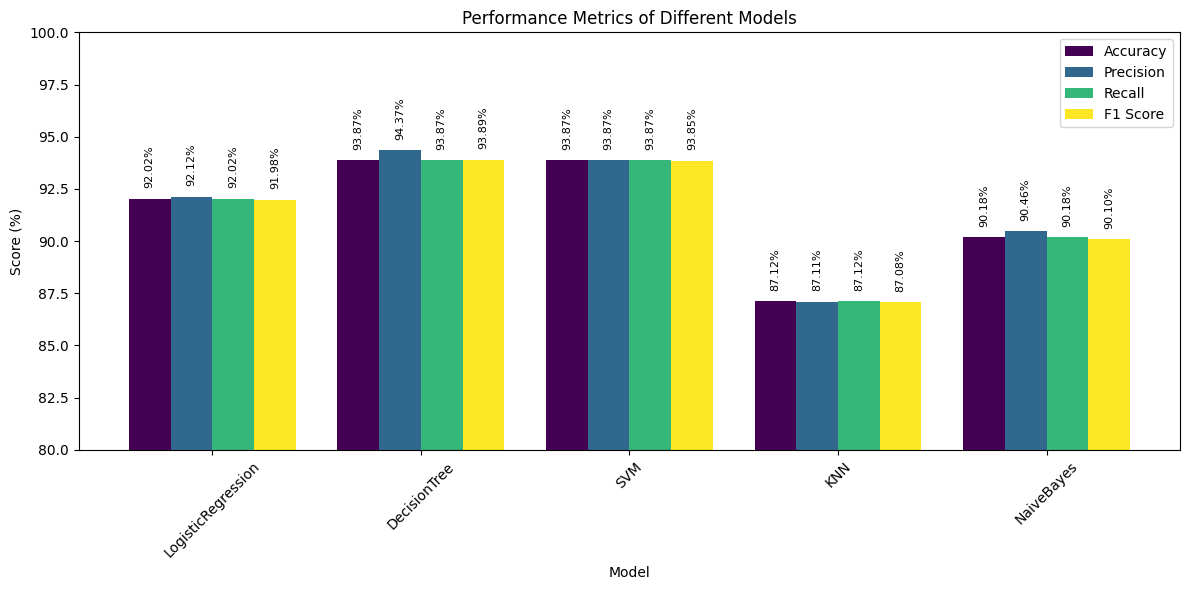

In [ ]:
# Importing Viridis color palette
colors = plt.cm.viridis(np.linspace(0, 1, 4))

# Extracting model names
models = list(model_scores.keys())

# Extracting scores
accuracy_scores = np.array([scores['test_accuracy'] for scores in model_scores.values()])*100
precision_scores = np.array([scores['test_precision'] for scores in model_scores.values()])*100
recall_scores = np.array([scores['test_recall'] for scores in model_scores.values()])*100
f1_scores = np.array([scores['test_f1'] for scores in model_scores.values()])*100

# Setting the positions for the bars
positions = np.arange(len(models))
bar_width = 0.2  # Width of each bar

# Plotting
plt.figure(figsize=(12, 6))

bars1 = plt.bar(positions - 1.5 * bar_width, accuracy_scores, width=bar_width, label='Accuracy', color=colors[0])
bars2 = plt.bar(positions - 0.5 * bar_width, precision_scores, width=bar_width, label='Precision', color=colors[1])
bars3 = plt.bar(positions + 0.5 * bar_width, recall_scores, width=bar_width, label='Recall', color=colors[2])
bars4 = plt.bar(positions + 1.5 * bar_width, f1_scores, width=bar_width, label='F1 Score', color=colors[3])

# Adding labels and ticks
plt.title('Performance Metrics of Different Models')
plt.xlabel('Model')
plt.ylabel('Score (%)')
plt.xticks(positions, models, rotation=45)
plt.legend()

# Set y-axis limit to start from 80
plt.ylim(80, 100)

# Add text labels above each bar with rotation
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}%', ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

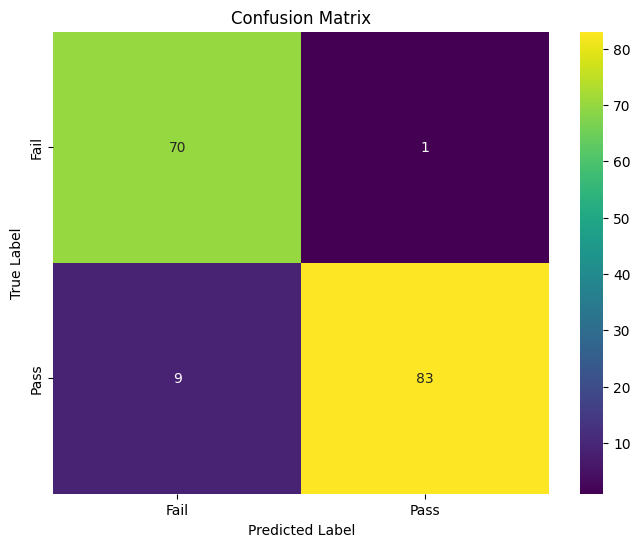

In [ ]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, best_models[best_model_name].predict(X_test))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='viridis', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Check for overfitting
train_accuracy = {}
for name, model in best_models.items():
    train_accuracy[name] = accuracy_score(y_train, model.predict(X_train))

for name, test_accuracy in model_scores.items():
    print(f"Model: {name}")
    print(f"Train Accuracy: {train_accuracy[name]:.4f}")
    print(f"Test Accuracy: {test_accuracy['test_accuracy']:.4f}")
    print(f"Overfitting: {train_accuracy[name] - test_accuracy['test_accuracy']:.4f}")
    print()

Model: LogisticRegression
Train Accuracy: 0.9444
Test Accuracy: 0.9202
Overfitting: 0.0242

Model: DecisionTree
Train Accuracy: 0.9383
Test Accuracy: 0.9387
Overfitting: -0.0004

Model: SVM
Train Accuracy: 0.9444
Test Accuracy: 0.9387
Overfitting: 0.0058

Model: KNN
Train Accuracy: 0.9033
Test Accuracy: 0.8712
Overfitting: 0.0321

Model: NaiveBayes
Train Accuracy: 0.8745
Test Accuracy: 0.9018
Overfitting: -0.0274



# Classification using Neural Networks

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from keras.callbacks import EarlyStopping

In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=10)

# Check the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (351, 16)
Shape of X_val: (62, 16)
Shape of X_test: (163, 16)


In [ ]:
# Creation of a neural network architecture
def create_model(input_dim, dropout_rate=0.3, optimizer='adam'):
    model = Sequential([
        Dense(32, activation='relu', input_dim=input_dim),
        Dropout(dropout_rate),
        Dense(16, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid') # Classification layer
    ])
    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy',
                       tf.keras.metrics.Precision(0.5),
                       tf.keras.metrics.Recall(0.5),])
    return model,early_stopping

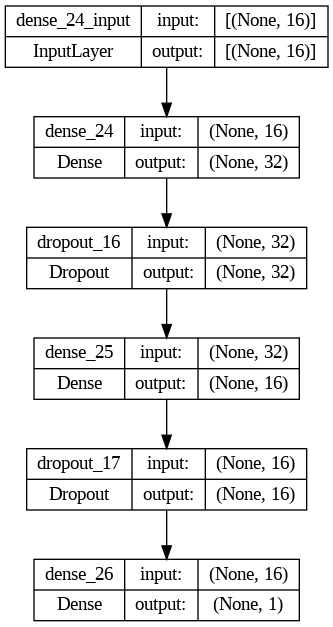

In [ ]:
# Determine the number of input features
input_dim = X_train.shape[1]

# Create the model
model,early_stopping = create_model(input_dim=input_dim)
keras.utils.plot_model(model, 'model_classification_shapes.png', show_shapes=True)

In [ ]:
# Train the model
num_epochs=100
train_history = model.fit(X_train,y_train,epochs=num_epochs,validation_data=((X_val, y_val)),callbacks=[early_stopping])

Epoch 1/100
11/11 [==============================] - 1s 31ms/step - loss: 0.8184 - accuracy: 0.4758 - precision_8: 0.5000 - recall_8: 0.6848 - val_loss: 0.6645 - val_accuracy: 0.5645 - val_precision_8: 0.5741 - val_recall_8: 0.8857
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7181 - accuracy: 0.5527 - precision_8: 0.5652 - recall_8: 0.6359 - val_loss: 0.6485 - val_accuracy: 0.6452 - val_precision_8: 0.6585 - val_recall_8: 0.7714
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6730 - accuracy: 0.5954 - precision_8: 0.6265 - recall_8: 0.5652 - val_loss: 0.6373 - val_accuracy: 0.7581 - val_precision_8: 0.7941 - val_recall_8: 0.7714
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 0.6681 - accuracy: 0.5783 - precision_8: 0.6169 - recall_8: 0.5163 - val_loss: 0.6155 - val_accuracy: 0.7419 - val_precision_8: 0.7568 - val_recall_8: 0.8000
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.

In [ ]:
# Evaluate the model
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9202
Precision: 0.9072
Recall: 0.9565


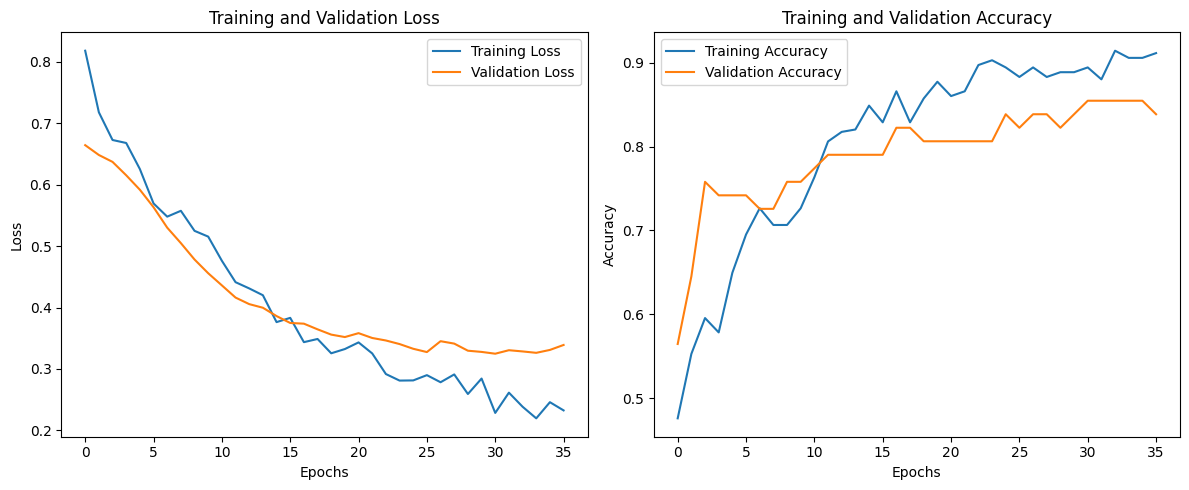

In [ ]:
epochs_range = range(num_epochs)
# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_history.history['loss'], label='Training Loss')
plt.plot(train_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_history.history['accuracy'], label='Training Accuracy')
plt.plot(train_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()
#If the training loss continues to decrease while the validation loss starts to increase or plateau, it indicates overfitting.

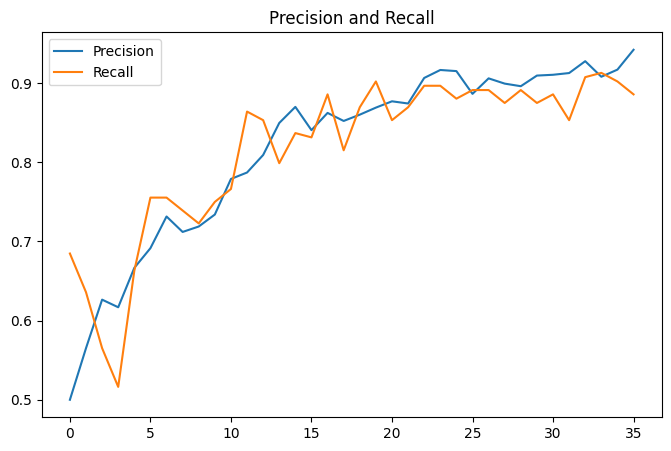

In [ ]:
# Plot Precision and Recall
precision = train_history.history['precision_8']
recall = train_history.history['recall_8']

plt.figure(figsize=(8, 5))
plt.plot(precision, label='Precision')
plt.plot(recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()

In [ ]:
# Use model for prediction
y_pred = model.predict(X_test)
y_pred[:10]

6/6 [==============================] - 15s 3s/step


array([[0.9999118 ],
       [0.41084957],
       [0.9999467 ],
       [0.28170875],
       [0.49054793],
       [0.99977034],
       [0.99989367],
       [0.04382582],
       [0.15402803],
       [0.10943665]], dtype=float32)

In [ ]:
# Map values above 0.5 as 1: "Pass" and below 0.5 as 0: "Fail"
y_pred = np.where(y_pred>=0.5, 1, 0)

In [ ]:
# Display Crosstab
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(), 'y_pred': y_pred.flatten().astype('int32')}, index = range(len(y_pred)))
pred_results.sample(10)
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,62,4
1,9,88


In [ ]:
# Model performance
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.9202453987730062
0.9072164948453608
0.9565217391304348


## Save and load Model

In [ ]:
# Save the model
model.save('/content/student_performance_model.h5')  # Saves the model to a HDF5 file

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('/content/student_performance_model.h5')

In [ ]:
# Evaluate the loaded model on the test data
loss, accuracy, precision, recall = loaded_model.evaluate(X_test, y_test, verbose=0)

print(f"Loaded model accuracy: {accuracy:.4f}")
print(f"Loaded model precision: {precision:.4f}")
print(f"Loaded model recall: {recall:.4f}")

Loaded model accuracy: 0.9202
Loaded model precision: 0.9072
Loaded model recall: 0.9565


In [ ]:
# Making predictions with the loaded model
y_pred_loaded = loaded_model.predict(X_test)
y_pred_loaded = np.where(y_pred_loaded >= 0.5, 1, 0)  # Convert probabilities to class labels

# Display some of the predictions alongside actual labels
comparison = pd.DataFrame({'Predicted': y_pred_loaded.flatten(), 'Actual': y_test})
print(comparison.head(10))

6/6 [==============================] - 0s 2ms/step
     Predicted  Actual
636          1       1
220          0       1
594          1       1
429          0       0
72           0       0
448          1       1
181          1       1
131          0       0
231          0       0
277          0       0
